만약 여러가지 특성이 있더라도 벡터를 구하기만 하면 거리를 계산할 수 있다.

- 어떤 문장이든, 그림이든 벡터로 표현할 수 있다면 거리를 구할 수 있다.
- 그림을 벡터로 만들어주는 알고리즘 : haralick
- 문장을 벡터로 만들어준다면? : sklearn의 CountVectorizer


In [1]:
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
vectorizer = CountVectorizer(min_df=1)

유사도를 측정하는 것은 지도학습이 아니기 때문에 라벨이 필요없다

In [3]:
contents = [
    '상처받은 아이들은 너무 일찍 커버려',
    '내가 상처받은 거 아는 사람 불편해',
    '잘 사는 사람들은 좋은 사람 되기 쉬워',
    '아무 일도 아니야 괜찮아'
]

In [4]:
from konlpy.tag import Okt

t = Okt()

In [5]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['상처', '받은', '아이', '들', '은', '너무', '일찍', '커버', '려'],
 ['내', '가', '상처', '받은', '거', '아는', '사람', '불편해'],
 ['잘', '사는', '사람', '들', '은', '좋은', '사람', '되기', '쉬워'],
 ['아무', '일도', '아니야', '괜찮아']]

nltk에 통과시키기 전에 형태소 분석한 결과를 띄어쓰기로 구분하여 하나의 문장으로 합치는 작업 필요

In [6]:
contents_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_for_vectorize.append(sentence)

contents_for_vectorize


[' 상처 받은 아이 들 은 너무 일찍 커버 려',
 ' 내 가 상처 받은 거 아는 사람 불편해',
 ' 잘 사는 사람 들 은 좋은 사람 되기 쉬워',
 ' 아무 일도 아니야 괜찮아']

벡터라이즈 수행

In [7]:
X = vectorizer.fit_transform(contents_for_vectorize)

In [9]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

네개의 문장에 전체 말뭉치의 단어가 17개 라는 뜻이다

In [11]:
len(vectorizer.get_feature_names_out())

17

#### counterVaectorize
- 말뭉치에 단어가 각 문장에 몇번 들어간 것인지 카운트 한 것

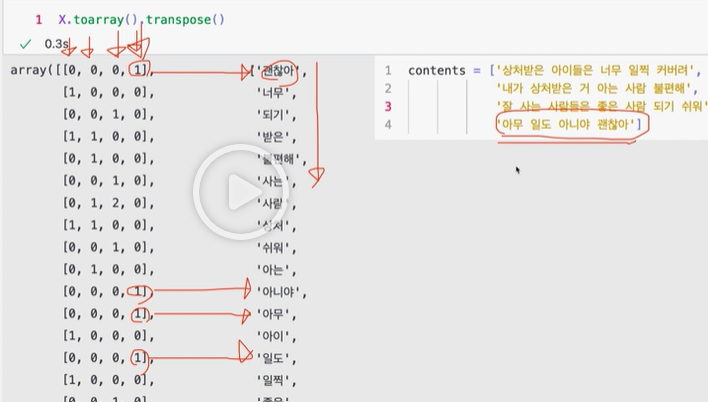  



In [13]:
new_post = ['상처받기 싫어 괜찮아']
new_post_tokens = [ t.morphs(word) for word in new_post ]

new_post_for_vectorize = []

for content in new_post_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 상처 받기 싫어 괜찮아']

In [14]:
#벡터 만들기
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

벡터를 만들었으니 거리를 구한다

In [15]:
import scipy as sp

def dist_raw(v1,v2):
    delta = v1-v2
    return sp.linalg.norm(delta.toarray())

이제 기존 4개의 문장과 새로운 문장의 거리를 각각 계산한다

In [16]:
dist = [dist_raw(each, new_post_vec) for each in X]

dist

[2.449489742783178, 2.23606797749979, 3.1622776601683795, 2.0]

In [17]:
print('Best post is',dist.index(min(dist)),', dist=',min(dist))
print('Test post is-->', new_post)
print('Best dist post is-->',contents[dist.index(min(dist))])

Best post is 3 , dist= 2.0
Test post is--> ['상처받기 싫어 괜찮아']
Best dist post is--> 아무 일도 아니야 괜찮아


- 결국 관건은 벡터로 잘 만드는 것과
- 만들어진 벡터 사이의 거리를 잘 계산하는 것

In [18]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())

print('-'*40)
print(new_post_vec.toarray())

[[0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1]]
[[0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0]]
[[0 0 1 0 0 1 2 0 1 0 0 0 0 0 0 1 0]]
[[1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0]]
----------------------------------------
[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]


여기서 말뭉치가 하는 역할은 각 문장을 같은 크기의 벡터로 만드는 작업을 
하는 것이다. 

---

형태소를 카운트하는 것에 CountVectorizer말고 다른 것은 없을까?

## tf-idf
- 여러 문서로 이루어진 문서군이 있을 때 어떤 단어가 특정 문서 내에서 얼마나 중요한지 나타내는 통계적 수치이다.
- 특정 문서내에서 자주나오는 단어는 중요하고, 여러 문서에서 자주나오는 단어는 덜 중요하다

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

In [31]:
X = vectorizer.fit_transform(contents_for_vectorize)
X

<4x17 sparse matrix of type '<class 'numpy.float64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [28]:
num_samples, num_features = X.shape
num_samples, num_features

(4, 17)

In [29]:
X.toarray().transpose()

array([[0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.40104275, 0.6191303 , 0.        ],
       [0.34431452, 0.40104275, 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.        , 0.50867187, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       ],
       [0.43671931, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.39264414, 0.        ],
       [0.43671931, 0.        , 0.        , 0.        ]])

In [33]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0.78528828, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.6191303 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [34]:
#정규화 해서 거리를 구하는 함수
def dist_norm(v1,v2):
    v1_norm = v1 / sp.linalg.norm(v1.toarray())
    v2_norm = v2 / sp.linalg.norm(v2.toarray())

    delta = v1_norm - v2_norm

    return sp.linalg.norm(delta.toarray())

In [35]:
dist = [dist_norm(each, new_post_vec) for each in X]
dist

[1.254451632446019, 1.2261339938790283, 1.4142135623730951, 1.1021396119773588]

---

## 네이버 지식인 검색결과에서 유사한 문장 찾기

In [36]:
import urllib.request
import json
import datetime

In [37]:
client_id = "YxqYDZhG2jiUF2wBqj0c"
client_secret = "bzaO7mOcZu"

In [38]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = '/' + api_node + '.json'
    param_query = '?query=' + urllib.parse.quote(search_text)
    param_start = '&start=' + str(start_num)
    param_disp = '&display=' + str(disp_num)

    return base + node + param_query + param_start + param_disp

In [39]:
def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print('[%s] Url Request Success' % datetime.datetime.now())
    return json.loads(response.read().decode('utf-8'))

In [41]:
url = gen_search_url('kin','파이썬',1,100)
one_result = get_result_onpage(url)
one_result

[2024-06-25 16:19:16.161217] Url Request Success


{'lastBuildDate': 'Tue, 25 Jun 2024 16:19:15 +0900',
 'total': 309994,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>파이썬</b> 독학',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=471368061&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0',
   'description': '학교에서 <b>파이썬</b>으로 문제 5개 주면 그걸 푸는 대회? 암튼 세특 써주는 활동을 하는데 제가 <b>파이썬</b>을 한번도... 안합니다 <b>파이썬</b> 전문적으로 하신분들 의견을 얻고 싶습니다 해본적이 없다면 <b>파이썬</b> 설치도 안됐겠죠? Download Python... '},
  {'title': '<b>파이썬</b> 코드 if',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=471515389&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0',
   'description': '<b>파이썬</b> 코드 프로그래밍 if 사용해서 복잡하지않은 간단한코드 하나 만들어주세요! (도움이 되셨다면 채택바랍니다) 아래 사이트에서 다른 코드들도 확인해 보시면 if를 사용한 많은 코드가... '},
  {'title': '<b>파이썬</b> 변수',
   'link': 'https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10402&docId=471303508&qb=7YyM7J207I2s&enc=utf8&section=kin.qna&rank=3&search_sort=0&spq=0',
   'desc

In [44]:
one_result['items'][0]['description']

'학교에서 <b>파이썬</b>으로 문제 5개 주면 그걸 푸는 대회? 암튼 세특 써주는 활동을 하는데 제가 <b>파이썬</b>을 한번도... 안합니다 <b>파이썬</b> 전문적으로 하신분들 의견을 얻고 싶습니다 해본적이 없다면 <b>파이썬</b> 설치도 안됐겠죠? Download Python... '

In [45]:
def delete_tag(input_str):
    input_str = input_str.replace('<b>','')
    input_str = input_str.replace('</b>','')
    return input_str

In [46]:
def get_description(pages):
    contents =[]

    for sentence in pages['items']:
        contents.append(delete_tag(sentence['description']))
    
    return contents

In [47]:
contents = get_description(one_result)
contents

['학교에서 파이썬으로 문제 5개 주면 그걸 푸는 대회? 암튼 세특 써주는 활동을 하는데 제가 파이썬을 한번도... 안합니다 파이썬 전문적으로 하신분들 의견을 얻고 싶습니다 해본적이 없다면 파이썬 설치도 안됐겠죠? Download Python... ',
 '파이썬 코드 프로그래밍 if 사용해서 복잡하지않은 간단한코드 하나 만들어주세요! (도움이 되셨다면 채택바랍니다) 아래 사이트에서 다른 코드들도 확인해 보시면 if를 사용한 많은 코드가... ',
 "파이썬 시험 쳤는데 변수 y=y+1 올바른 변수인가요? 챗지피티에서는 잘못된 변수라고 하던데 입니다. 이 구문은... 하면, 파이썬은 y가 정의되지 않았다는 오류를 발생시킵니다. 예를 들어 이 경우 파이썬은 NameError: name 'y' is not... ",
 '안녕하세요 바이오파이썬을 시작해보려는 파이썬 왕초보입니다 뭘... 설명된대로 파이썬 인터랙티브 모드를 실행시킨 다음에, 깜빡이는 커서... 경로설정 그런게 문제일까요?(파이썬 왕초보라서 잘 모릅니다 ㅠㅠㅠ) 도와주세요... ',
 '... 윈도우에서는 파이썬 간단하게 뭐 입력해보고 저장한 뒤 마우스... 우선 파이썬을 설치하고 환경 변수를 설정하는 등 개발 환경을 구축했다면... Visual Studio Code for Mac에 파이썬을 연동하시면 됩니다. 맥에서는 터미널이... ',
 '파이썬 기말고사가 오픈 북 시험인데, 파일 보시고, 하는 과정 좀 알려주세요. 지금 해서 제출해야 하니 제발... Python(파이썬), DB 과제 도움드립니다.(pc접속시 링크) &gt;JAVA, C, C#, Python(파이썬), DB 과제 도움드립니다.(모바일 접속시... ',
 '... 있는데요 파이썬으로 하는 수행평가 입니다. 수행평가 자료를 주셨는데 저는 지금 전반적으로 파이썬에 대한 이해가 잘 되어 있지 않은 상태입니다... 파이썬 기초 공부를... 1학기 거의 다갔는데, 파이썬 잘 모르시는 거면 진도에 비해... ',
 '... 일단 파이썬부터 배우

이제 형태소 분석하여 벡터라이즈

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [49]:
t = Okt()
vectorizer = CountVectorizer(min_df=1)

In [50]:
contents_tokens = [t.morphs(row) for row in contents]
contents_tokens

[['학교',
  '에서',
  '파이썬',
  '으로',
  '문제',
  '5',
  '개',
  '주면',
  '그걸',
  '푸는',
  '대회',
  '?',
  '암튼',
  '세특',
  '써주는',
  '활동',
  '을',
  '하는데',
  '제',
  '가',
  '파이썬',
  '을',
  '한번',
  '도',
  '...',
  '안',
  '합니다',
  '파이썬',
  '전문',
  '적',
  '으로',
  '하',
  '신분',
  '들',
  '의견',
  '을',
  '얻고',
  '싶습니다',
  '해',
  '본적',
  '이',
  '없다면',
  '파이썬',
  '설치',
  '도',
  '안',
  '됐겠죠',
  '?',
  'Download',
  'Python',
  '...'],
 ['파이썬',
  '코드',
  '프로그래밍',
  'if',
  '사용',
  '해서',
  '복잡하지',
  '않은',
  '간단한',
  '코드',
  '하나',
  '만들어주세요',
  '!',
  '(',
  '도움',
  '이',
  '되셨다면',
  '채택',
  '바랍니다',
  ')',
  '아래',
  '사이트',
  '에서',
  '다른',
  '코드',
  '들',
  '도',
  '확인',
  '해',
  '보시',
  '면',
  'if',
  '를',
  '사용',
  '한',
  '많은',
  '코드',
  '가',
  '...'],
 ['파이썬',
  '시험',
  '쳤는데',
  '변수',
  'y',
  '=',
  'y',
  '+',
  '1',
  '올바른',
  '변수',
  '인가요',
  '?',
  '챗',
  '지피',
  '티',
  '에서는',
  '잘',
  '못',
  '된',
  '변수',
  '라고',
  '하던데',
  '입니다',
  '.',
  '이',
  '구문',
  '은',
  '...',
  '하면',
  ',',
  '파이썬',
  '은',
  'y',
  '

In [51]:
#형태소 분석 단위로 띄어쓰기

contents_post_for_vectorize = []

for content in contents_tokens:
    sentence = ''
    for word in content:
        sentence = sentence + ' ' + word

    contents_post_for_vectorize.append(sentence)

contents_post_for_vectorize

[' 학교 에서 파이썬 으로 문제 5 개 주면 그걸 푸는 대회 ? 암튼 세특 써주는 활동 을 하는데 제 가 파이썬 을 한번 도 ... 안 합니다 파이썬 전문 적 으로 하 신분 들 의견 을 얻고 싶습니다 해 본적 이 없다면 파이썬 설치 도 안 됐겠죠 ? Download Python ...',
 ' 파이썬 코드 프로그래밍 if 사용 해서 복잡하지 않은 간단한 코드 하나 만들어주세요 ! ( 도움 이 되셨다면 채택 바랍니다 ) 아래 사이트 에서 다른 코드 들 도 확인 해 보시 면 if 를 사용 한 많은 코드 가 ...',
 " 파이썬 시험 쳤는데 변수 y = y + 1 올바른 변수 인가요 ? 챗 지피 티 에서는 잘 못 된 변수 라고 하던데 입니다 . 이 구문 은 ... 하면 , 파이썬 은 y 가 정의 되지 않았다는 오류 를 발생 시킵니다 . 예 를 들어 이 경우 파이썬 은 NameError : name ' y ' is not ...",
 ' 안녕하세요 바이오파이썬 을 시작 해보려는 파이썬 왕초 보입니다 뭘 ... 설명 된대로 파이썬 인터 랙티브 모드 를 실행 시킨 다음 에 , 깜빡이는 커서 ... 경로 설정 그런게 문 제일 까요 ?( 파이썬 왕초보 라서 잘 모릅니다 ㅠㅠㅠ ) 도와주세요 ...',
 ' ... 윈도우 에서는 파이썬 간단하게 뭐 입력 해보고 저장 한 뒤 마우스 ... 우선 파이썬 을 설치 하고 환경 변수 를 설정 하는 등 개발 환경 을 구축 했다면 ... Visual Studio Code for Mac 에 파이썬 을 연동 하시면 됩니다 . 맥 에서는 터미널 이 ...',
 ' 파이썬 기말고사 가 오픈 북 시험 인데 , 파일 보시 고 , 하는 과정 좀 알려주세요 . 지금 해서 제출 해야 하니 제발 ... Python ( 파이썬 ), DB 과제 도움 드립니다 .( pc 접속 시 링크 ) & gt ; JAVA , C , C #, Python ( 파이썬 ), DB 과제 도움 드립니다 .( 모바일 접속 시 ...',
 ' ... 있는데요 파이썬 으로 하는 수행평

In [52]:
X = vectorizer.fit_transform(contents_post_for_vectorize)
num_samples, num_features = X.shape

In [53]:
num_samples, num_features

(100, 1196)

In [63]:
def new_post_vec(new_post=list):
    new_post_tokens = [ t.morphs(row) for row in new_post]

    new_post_for_vectorize = []

    for content in new_post_tokens:
        sentence = ''
        for word in content:
            sentence = sentence + ' ' + word

        new_post_for_vectorize.append(sentence)

    return new_post_for_vectorize

In [64]:
new_post = ['파이썬을 배우는데 좋은 방법이 어떤 것인지 추천해주세요']

In [66]:
new_post_for_vectorize= new_post_vec(new_post)

In [67]:
#벡터화 하기
new_vectorizer = vectorizer.transform(new_post_for_vectorize)
new_vectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
#거리계산
dist = [dist_raw(each, new_vectorizer) for each in X]
dist

[6.708203932499369,
 7.0,
 6.557438524302,
 6.082762530298219,
 6.557438524302,
 7.416198487095663,
 6.928203230275509,
 6.557438524302,
 8.366600265340756,
 6.48074069840786,
 7.280109889280518,
 7.681145747868608,
 9.16515138991168,
 6.244997998398398,
 14.422205101855956,
 11.958260743101398,
 5.291502622129181,
 7.0,
 6.4031242374328485,
 7.681145747868608,
 6.082762530298219,
 6.4031242374328485,
 5.5677643628300215,
 6.4031242374328485,
 7.810249675906654,
 6.6332495807108,
 6.082762530298219,
 8.06225774829855,
 7.211102550927978,
 6.928203230275509,
 6.855654600401044,
 7.3484692283495345,
 6.708203932499369,
 8.48528137423857,
 6.557438524302,
 7.0710678118654755,
 6.557438524302,
 6.244997998398398,
 8.246211251235321,
 8.0,
 6.244997998398398,
 7.211102550927978,
 6.855654600401044,
 7.681145747868608,
 7.681145747868608,
 7.54983443527075,
 6.324555320336759,
 7.483314773547883,
 10.954451150103322,
 7.0,
 6.928203230275509,
 7.3484692283495345,
 8.06225774829855,
 7.071067

In [69]:
#유사 문장 결과
print('Best post is',dist.index(min(dist)),', dist=',min(dist))
print('Test post is-->', new_post)
print('Best dist post is-->',contents[dist.index(min(dist))])

Best post is 16 , dist= 5.291502622129181
Test post is--> ['파이썬을 배우는데 좋은 방법이 어떤 것인지 추천해주세요']
Best dist post is--> 고등학생이 할수 있는 쉬운 파이썬 코드 알려주세요 창의성있고 신박하면 좋겠어요!! 오늘 내로 답해주시면 내공 100드립니다 (도움이 되셨다면 채택바랍니다) 다음과 같이 것들을... 


---

***스스로 보충***
 - 유사문장 검색엔진 함수

In [71]:
def naver_api_search(api_node, search_text, start_num, disp_num):
    client_id = "YxqYDZhG2jiUF2wBqj0c"
    client_secret = "bzaO7mOcZu"

    url = gen_search_url(api_node, search_text, start_num, disp_num)
    one_result = get_result_onpage(url)
    contents = get_description(one_result)

    return contents

In [79]:
def similar_description(contents, new_post=list):
    t = Okt()
    vectorizer = CountVectorizer(min_df=1)
    contents_tokens = [t.morphs(row) for row in contents]
    contents_post_for_vectorize = []

    for content in contents_tokens:
        sentence = ''
        for word in content:
            sentence = sentence + ' ' + word

        contents_post_for_vectorize.append(sentence)

    #fit_transform
    X = vectorizer.fit_transform(contents_post_for_vectorize)

    #새로운 문장 벡터화
    new_post_for_vectorize= new_post_vec(new_post) #형태소 분석
    new_vectorizer = vectorizer.transform(new_post_for_vectorize) 
    new_vectorizer.toarray()

    #거리계산
    dist = [dist_raw(each, new_vectorizer) for each in X]

    #유사 문장 결과
    print('Best post is',dist.index(min(dist)),', dist=',min(dist))
    print('Test post is-->', new_post)
    print('Best dist post is-->',contents[dist.index(min(dist))])

    return new_post, contents[dist.index(min(dist))]
    


In [75]:
contents= naver_api_search('kin','파이썬',1,100)

[2024-06-25 16:57:50.423184] Url Request Success


In [80]:
new_post = ['파이썬 공부 책 추천좀 해주세요']
similar_description(contents,new_post)

Best post is 16 , dist= 4.898979485566356
Test post is--> ['파이썬 공부 책 추천좀 해주세요']
Best dist post is--> 고등학생이 할수 있는 쉬운 파이썬 코드 알려주세요 창의성있고 신박하면 좋겠어요!! 오늘 내로 답해주시면 내공 100드립니다 (도움이 되셨다면 채택바랍니다) 다음과 같이 것들을... 


(['파이썬 공부 책 추천좀 해주세요'],
 '고등학생이 할수 있는 쉬운 파이썬 코드 알려주세요 창의성있고 신박하면 좋겠어요!! 오늘 내로 답해주시면 내공 100드립니다 (도움이 되셨다면 채택바랍니다) 다음과 같이 것들을... ')

In [81]:
contents= naver_api_search('kin','에스파',1,100)
new_post = ['에스파 콘서트 가는법']

similar_description(contents,new_post)

[2024-06-25 17:00:36.413291] Url Request Success
Best post is 29 , dist= 3.3166247903554
Test post is--> ['에스파 콘서트 가는법']
Best dist post is--> 에스파 윈터 버블 자주오나요? 에스파 멤버들 대부분 자주 옵니다 효녀에요


(['에스파 콘서트 가는법'], '에스파 윈터 버블 자주오나요? 에스파 멤버들 대부분 자주 옵니다 효녀에요')